HW5 notebook for CUSP PUI2015
written by fbb

Wage Gap regression model


In [11]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import json
import os

pl.rcParams['font.size'] = 20 
from IPython.core.display import HTML

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data on the class webpage tho.

In [13]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

# print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [14]:
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)
# print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

##exploratory phase

In [15]:
#print males.keys()
#print allmales['all'].keys()[0], allmales['all'][allmales['all'].keys()[0]]

from pandas.tools.plotting import scatter_matrix
# print allmales['all']['Median income'][1]

35228


0                                                   NaN
1                                             ....Total
2                                              Earnings
3                                    ..Wages and Salary
4                             ..Nonfarm Self-Employment
5                                ..Farm Self-Employment
6                                       Social Security
7                    SSI (Supplemental Security Income)
8                                     Public Assistance
9                                     Veterans Benefits
10                                    Survivor Benefits
11                                  Disability Benefits
12                            Unemployment Compensation
13                                 Workers Compensation
14                                      Property Income
15                                           ..Interest
16                                          ..Dividends
17                ..Rents, Royalties, Estates or

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fec05d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110a4ad10>]], dtype=object)

/Users/Faye/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


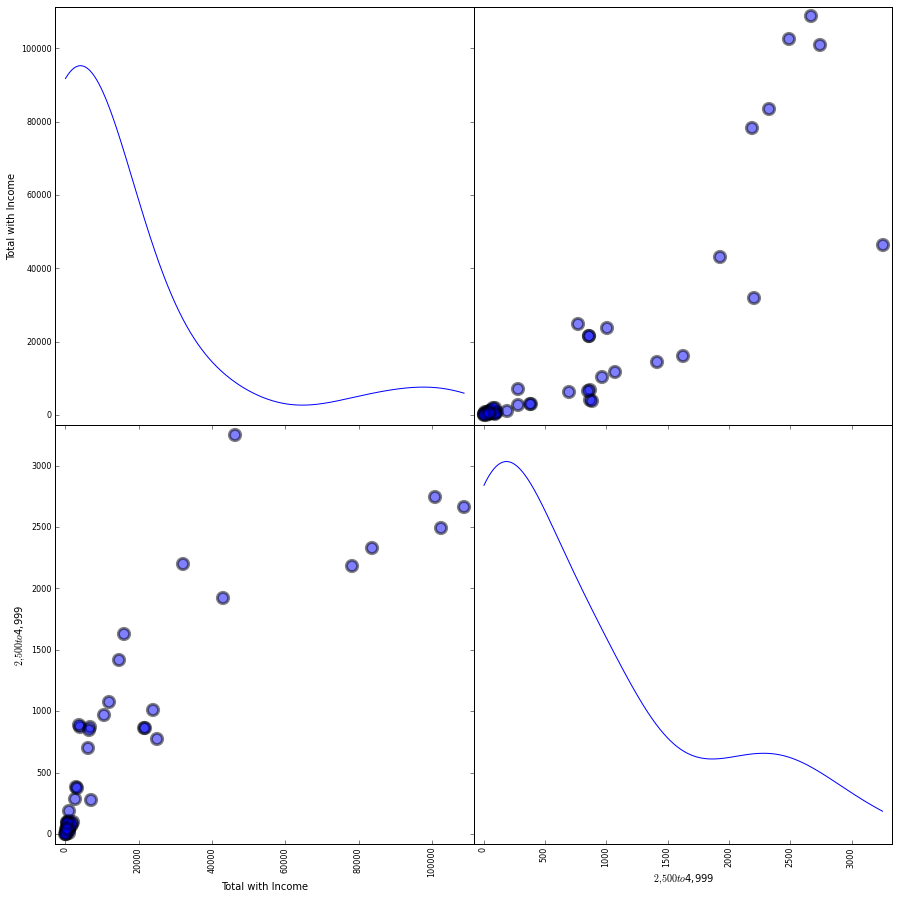

In [16]:
# print  allmales['all'][u'Characteristic']
# scatter_matrix(allmales['all'][[u'Total with Income',
#                                 u'$2,500 to $4,999',u'Median income',u'Gini ratio']], 
#                figsize=(15,15), linewidth= 3, s=500, diagonal='kde')

/Users/Faye/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110a87b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1123adcd0>]], dtype=object)

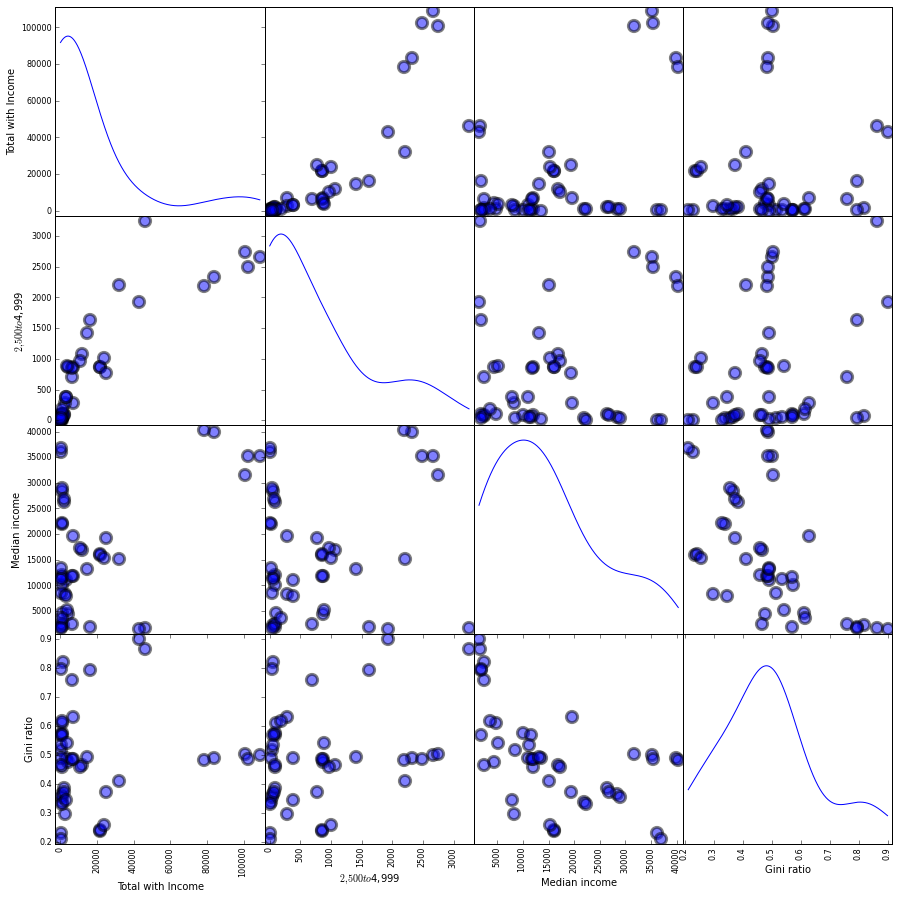

In [17]:


for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)
# scatter_matrix(allmales['all']
#                    [[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']],
#                    linewidth= 3, s=500, figsize=(15,15), diagonal='kde')


/Users/Faye/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112891f90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11343fc90>]], dtype=object)

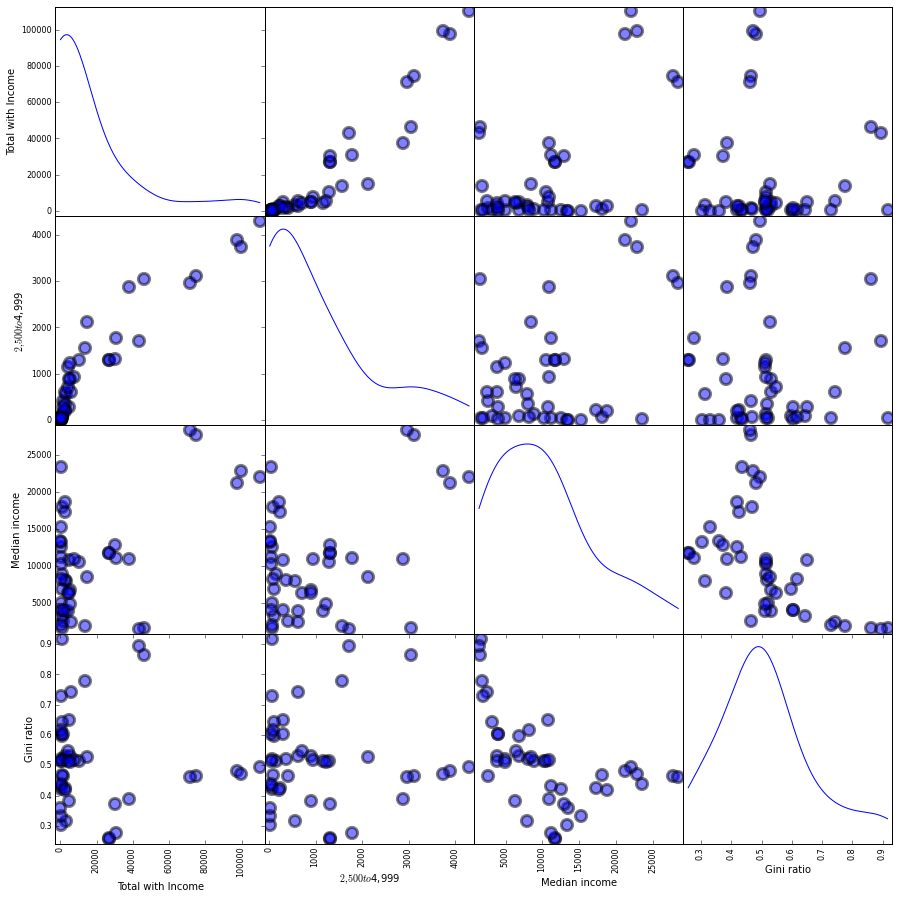

In [18]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)
# scatter_matrix(allfemales['all']
#                    [[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']], 
#                linewidth= 3, s=500, figsize=(15,15), diagonal='kde')


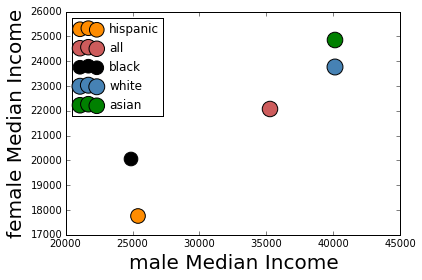

In [19]:
##plotting the Total median incame by race
col={'all':'IndianRed','white':'SteelBlue','black':'black','hispanic':'DarkOrange','asian':'green'}
# for k in col.iterkeys():
#     pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
# pl.xlabel('male Median Income',fontsize=20)
# pl.ylabel('female Median Income',fontsize=20)
# pl.legend(loc=2)


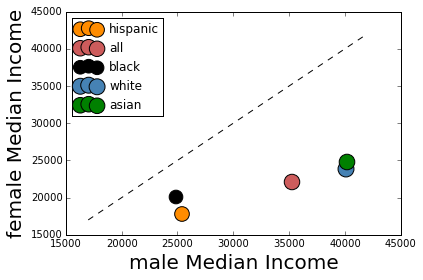

In [20]:
#and adding a 1-1 regression line: how things would be if the income was gender unbiased
# for k in col.iterkeys():
#     pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
# pl.plot([17000,42000],[17000,42000],'k--')
# pl.xlabel('male Median Income',fontsize=20)
# pl.ylabel('female Median Income',fontsize=20)
# pl.legend(loc=2)

Slopes for the regression done with different methods:
	 polyfit 0.59
	 direct residual minimization: 0.59
	 direct residual minimization not forcing 0 intercept: 0.59
	 analytical: 0.57


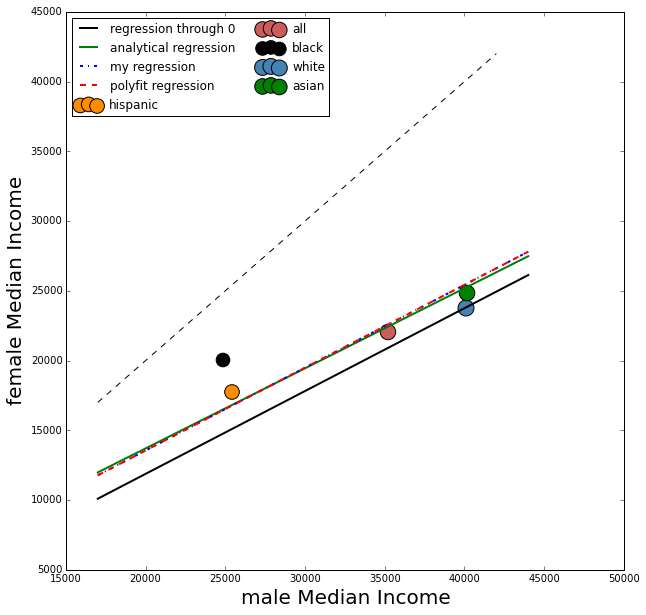

In [21]:
#then regress a line to the data: 
#independent variable male median total income, 
#dependent variable female total median income, race/ethnicity by race/ethnicity

##NOTE: i am about to do it in a few different ways
#to demonstrate how you could do it. of course you did not have to do it in more 
#than one way for the grade
# pl.figure(figsize=(10,10))
# for k in col.iterkeys():
#     pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
    
from scipy import stats
from scipy.optimize import minimize

##set up regression: make array of incomes for all groups, each ethnic group is a datapoint
all_males=np.array([0.,allmales['all']['Median income'][1],allmales['white']['Median income'][1],allmales['black']['Median income'][1],allmales['hispanic']['Median income'][1],allmales['asian']['Median income'][1]])
all_females=np.array([0.,allfemales['all']['Median income'][1],allfemales['white']['Median income'][1],allfemales['black']['Median income'][1],allfemales['hispanic']['Median income'][1],allfemales['asian']['Median income'][1]])


# pl.plot([17000,42000],[17000,42000],'k--')
# pl.xlabel('male Median Income',fontsize=20)
# pl.ylabel('female Median Income',fontsize=20)

#one way to fit: with numpy polyfit
m,b = np.polyfit(all_males, all_females, 1) 

#another way os to minimize the residuals
stline = lambda a,x,y: sum((a*x-y)**2)
result = minimize(stline, m, args=(all_males, all_females))
stline_non0 = lambda a,x,y: sum((a[0]*x+a[1]-y)**2)
par0 = [m,b]
result_non0 = minimize(stline_non0, par0, args=(all_males, all_females))

#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()

# print "Slopes for the regression done with different methods:"
# print "\t polyfit {0:.2f}".format(m)
# print "\t direct residual minimization: {0:.2f}".format(result.x[0])
# print "\t direct residual minimization not forcing 0 intercept: {0:.2f}".format(result_non0.x[0])
# print "\t analytical: {0:.2f}".format(beta1)

# pl.plot(range(17000,45000,1000),result.x*np.arange(17000,45000,1000),'k', lw = 2, label="regression through 0")
# pl.plot(range(17000,45000,1000),beta0+beta1*np.arange(17000,45000,1000),'g', lw = 2, label="analytical regression")
# pl.plot(range(17000,45000,1000),result_non0.x[1]+result_non0.x[0]*np.arange(17000,45000,1000),'b-.', lw = 2, label="my regression")
# pl.plot(range(17000,45000,1000),b+m*np.arange(17000,45000,1000),'r--', lw = 2, label="polyfit regression")

# pl.legend(loc=2, ncol=2)

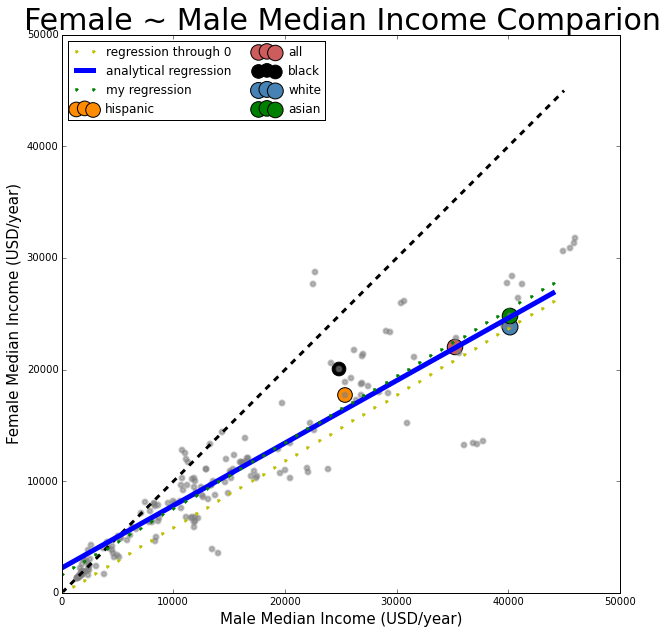

In [25]:
pl.figure(figsize=(10,10))
for k in col.iterkeys():
    pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
    
from scipy import stats
from scipy.optimize import minimize

all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())
all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask
#print all_males
pl.scatter(all_males, all_females, color='grey',lw=2.5, alpha=0.5)

pl.plot([0,45000], [0,45000],'k--', lw=3)
pl.xlabel('Male Median Income (USD/year)',fontsize=15)
pl.ylabel('Female Median Income (USD/year)',fontsize=15)
pl.title('Female ~ Male Median Income Comparion',fontsize=30)
pl.ylim(0,50000)
pl.xlim(0,50000)

#another way to minimize the residuals
stline = lambda a,x,y: sum((a*x - y)**2)
result = minimize(stline, m, args=(all_males, all_females))
stline_non0 = lambda a,x,y: sum((a[0]*x + a[1] - y)**2)
par0 = [m,b]
result_non0 = minimize(stline_non0, par0, args=(all_males, all_females))

#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1 = cor[0]*all_females.std()/all_males.std()
beta0 = all_females.mean() - beta1*all_males.mean()

pl.plot(range(0,45000,1000), result.x*np.arange(0,45000,1000),'y.', lw = 1, label="regression through 0")
pl.plot(range(0,45000,1000), beta0 + beta1*np.arange(0,45000,1000),'b', lw = 5, label="analytical regression")
pl.plot(range(0,45000,1000), result_non0.x[1] + result_non0.x[0]*np.arange(0,45000,1000),'g.', lw = 1, label="my regression")

pl.legend(loc=2, ncol=2)